Loading the library

In [1]:
from pypelines import utils
import pandas as pd
from sktime.datasets import load_arrow_head
from pypelines import ts_clustering_pipeline as pipe

X_train, y_train = load_arrow_head(split="train")
X_test, y_test = load_arrow_head(split="test")

Data Load and Model Selection

In [2]:
tsc = pipe.TSClusteringPipeline(data=X_train)

Default Hyperparameters

In [3]:
tsc.get_hyperparameters()
tsc.code_to_clipboard()

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END init_algorithm=random, metric=dtw, n_clusters=4;, score=nan total time= 1.7min
[CV 2/3] END init_algorithm=random, metric=dtw, n_clusters=4;, score=nan total time= 1.7min
[CV 3/3] END init_algorithm=random, metric=dtw, n_clusters=4;, score=nan total time= 2.2min


<Figure size 500x1000 with 0 Axes>

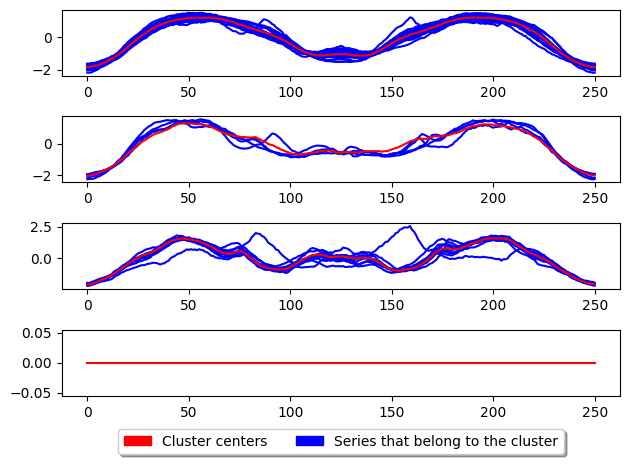

In [6]:

from sktime import *


import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


features = list(X_train.columns)

# train test split
X_train = X_train[features]

model_comparison_list = []

##### End of Data Processing Pipeline #####


##### Model Pipeline for CNN #####

from sktime.clustering.k_means import TimeSeriesKMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sktime.clustering.utils.plotting._plot_partitions import plot_cluster_algorithm
TimeSeriesKMeans_param_grid = {
"n_clusters": np.arange(4, 20, 4),
"init_algorithm": ['random'],
"metric": ['dtw'],
}

TimeSeriesKMeans_model = TimeSeriesKMeans()

# Create the grid search
def scorer_f(estimator, X_test):   #dummy scorer for unsupervised model gridsearch
      return 1
TimeSeriesKMeans_grid_search = GridSearchCV(estimator=TimeSeriesKMeans_model, param_grid=TimeSeriesKMeans_param_grid, cv=3, scoring=scorer_f, verbose=3)
TimeSeriesKMeans_grid_search.fit(X_train)

# Get the best hyperparameters
TimeSeriesKMeans_best_estimator = TimeSeriesKMeans_grid_search.best_estimator_

# Store results as a dataframe  
TimeSeriesKMeans_search_results = pd.DataFrame(TimeSeriesKMeans_grid_search.cv_results_)

# Plot clusters
plot_cluster_algorithm(TimeSeriesKMeans_best_estimator, X_train, TimeSeriesKMeans_best_estimator.n_clusters)
##### End of Model Pipeline for CNN #####
##### Model Comparison #####

